<a href="https://colab.research.google.com/github/ZairaOR/AI_IB_A2024/blob/main/Assignments/Assignment_6_FFNN_1983377.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Assignment 5.-Artificial Neural Network: feedward.**

Studen: Zaira Olivares Rosales

ID Number: 1983377

Class Time: Thursday N4N6

## **Goal:**
To train a Feedforward Neural Network model.

## **Load Libraries**

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
# Helper libraries
import numpy as np
import matplotlib.pyplot as plt
import random
print(tf.__version__)

2.17.0


## **Load Data**

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
class_names = ['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven', 'Eight', 'Nine', 'Ten']
train_images.shape
len(train_labels)
train_labels
len(test_labels)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


10000

## **Data Preprocessing**

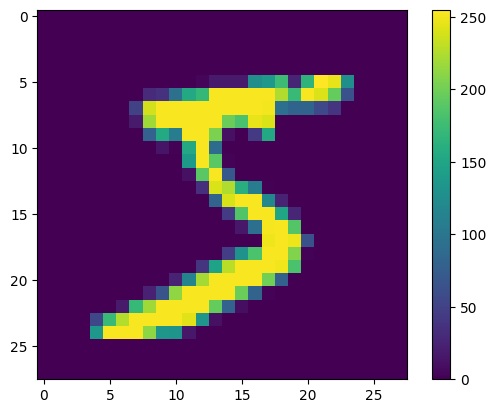

In [3]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

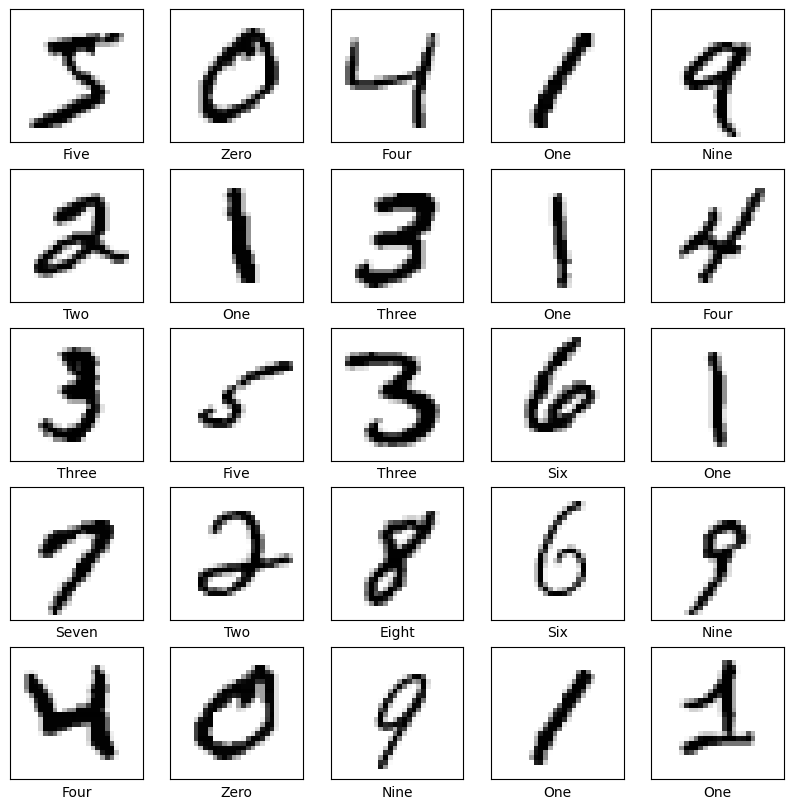

In [5]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


In [6]:
model = tf.keras.Sequential([
      tf.keras.layers.Flatten(input_shape=(28, 28)),
          tf.keras.layers.Dense(128, activation='relu'),
              tf.keras.layers.Dense(10)
              ])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [7]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                            metrics=['accuracy'])

## **Model selection and training**

In [8]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.8781 - loss: 0.4336
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.9657 - loss: 0.1170
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9773 - loss: 0.0766
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9834 - loss: 0.0535
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9869 - loss: 0.0428
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9909 - loss: 0.0309
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9920 - loss: 0.0266
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9941 - loss: 0.0200
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9946 - loss: 0.0170
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9962 - loss: 0.0126


In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - 2ms/step - accuracy: 0.9786 - loss: 0.0791

Test accuracy: 0.978600025177002


In [10]:
probability_model = tf.keras.Sequential([model,
                    tf.keras.layers.Softmax()])


In [11]:
predictions = probability_model.predict(test_images)
predictions[0]


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([8.3913008e-11, 6.6556496e-11, 5.3710933e-09, 2.2739478e-05,
       2.9381740e-17, 5.8850425e-10, 3.8106271e-18, 9.9997717e-01,
       1.8976787e-10, 1.1591199e-08], dtype=float32)

In [12]:
np.argmax(predictions[0])

7

In [13]:
test_labels[0]

7

## **Model testing**

In [14]:
def plot_image(i, predictions_array, true_label, img):
    predictions_array, true_label, img = predictions_array, true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])

    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
      color = 'blue'
    else:
      color = 'red'

    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                  100*np.max(predictions_array),
                                  class_names[true_label]),
                                  color=color)

def plot_value_array(i, predictions_array, true_label):
 predictions_array, true_label = predictions_array, true_label[i]
 plt.grid(False)
 plt.xticks(range(10))
 plt.yticks([])
 thisplot = plt.bar(range(10), predictions_array, color="#777777")
 plt.ylim([0, 1])
 predicted_label = np.argmax(predictions_array)
 thisplot[predicted_label].set_color('red')
 thisplot[true_label].set_color('blue')

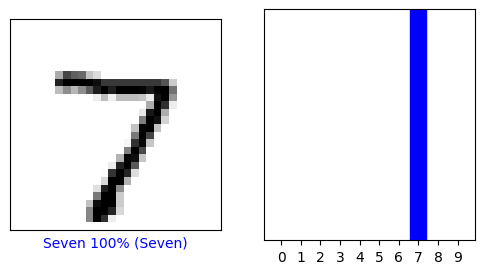

In [15]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

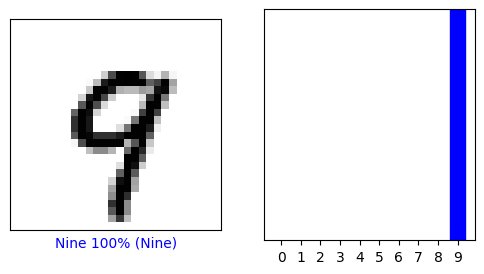

In [16]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

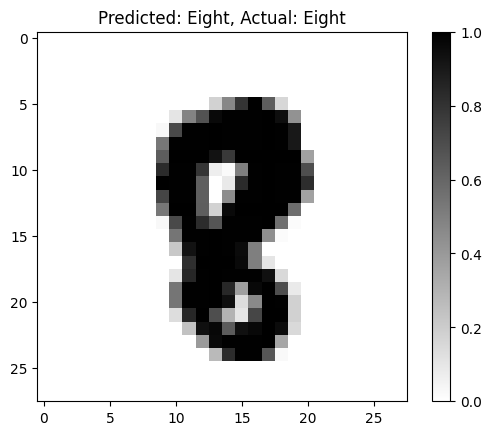

In [17]:
# Function to display a random test image along with its predicted and actual values
def display_random_prediction(test_images, predictions, test_labels, class_names):
    # Selecting a random index
    index = random.randint(0, len(test_images) - 1)
    # Displaying the image
    plt.figure()
    plt.imshow(test_images[index], cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.title(f"Predicted: {class_names[np.argmax(predictions[index])]}, Actual: {class_names[test_labels[index]]}")
    plt.show()

# Displaying 5 random predictionspredictions
for _ in range(1):
    display_random_prediction(test_images, predictions, test_labels, class_names)

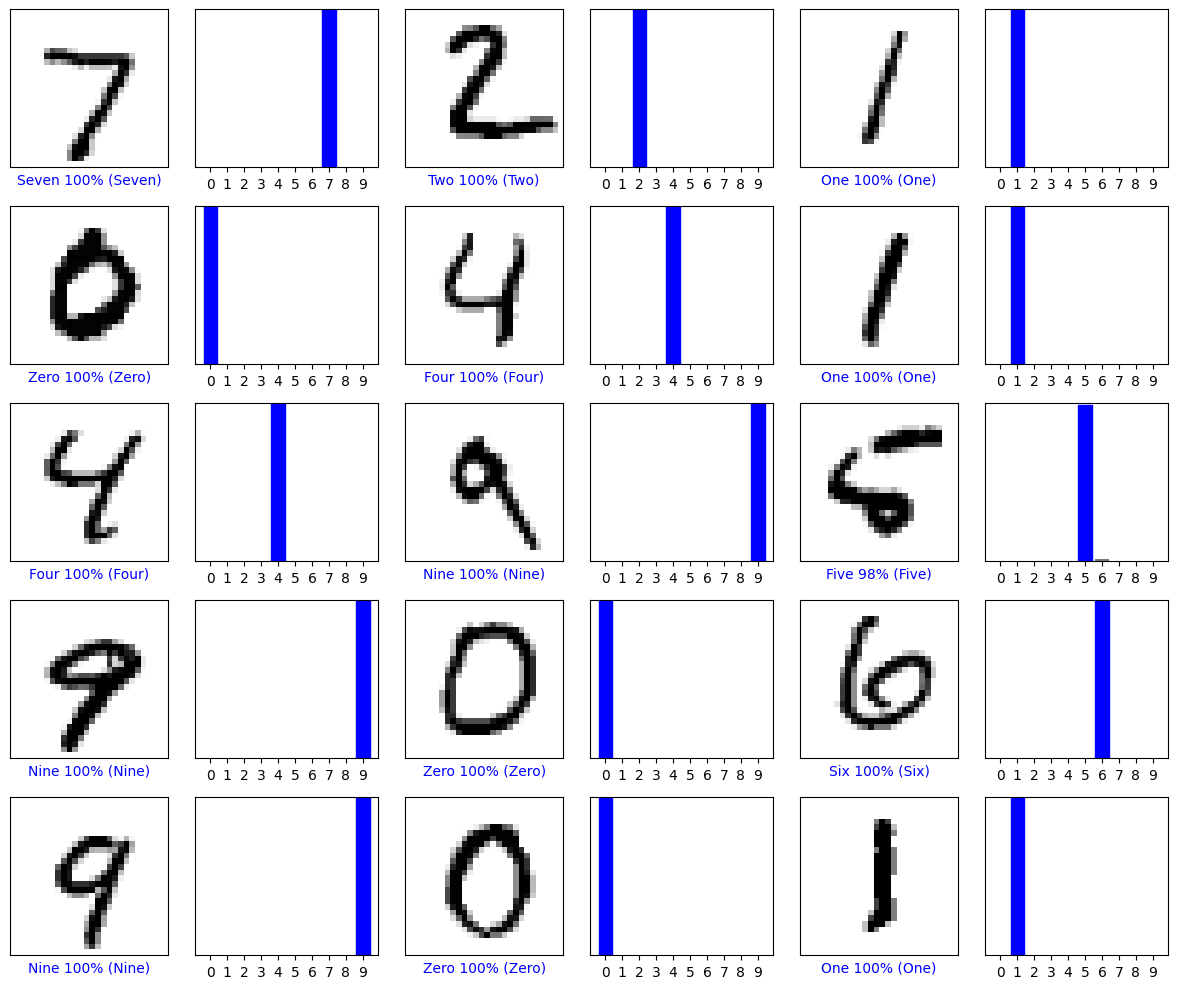

In [18]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], test_labels, test_images)
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

In [19]:
img = test_images[1]

print(img.shape)

(28, 28)


In [20]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [21]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
[[ -7.4004      -7.299596    17.04682     -2.9502032  -29.066967
   -0.38195622 -10.887712   -24.250147     0.81725436 -20.096514  ]]


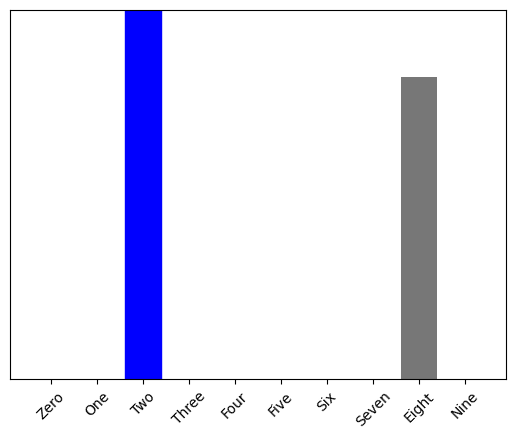

In [22]:
# Plot the value array
plot_value_array(1, predictions_single[0], test_labels)

# Set the correct number of ticks and labels
_ = plt.xticks(range(10), class_names[:10], rotation=45)

# Show the plot
plt.show()

In [23]:
np.argmax(predictions_single[0])

2